In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

drinks = pd.read_csv('./drinks.csv')
drinks.head()

country  beer_servings  spirit_servings  wine_servings  \
0  Afghanistan              0                0              0   
1      Albania             89              132             54   
2      Algeria             25                0             14   
3      Andorra            245              138            312   
4       Angola            217               57             45   

   total_litres_of_pure_alcohol continent  
0                           0.0        AS  
1                           4.9        EU  
2                           0.7        AF  
3                          12.4        EU  
4                           5.9        AF

In [3]:
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
country                         193 non-null object
beer_servings                   193 non-null int64
spirit_servings                 193 non-null int64
wine_servings                   193 non-null int64
total_litres_of_pure_alcohol    193 non-null float64
continent                       170 non-null object
dtypes: float64(1), int64(3), object(2)
memory usage: 9.1+ KB


In [2]:
drinks.describe()

beer_servings  spirit_servings  wine_servings  \
count     193.000000       193.000000     193.000000   
mean      106.160622        80.994819      49.450777   
std       101.143103        88.284312      79.697598   
min         0.000000         0.000000       0.000000   
25%        20.000000         4.000000       1.000000   
50%        76.000000        56.000000       8.000000   
75%       188.000000       128.000000      59.000000   
max       376.000000       438.000000     370.000000   

       total_litres_of_pure_alcohol  
count                    193.000000  
mean                       4.717098  
std                        3.773298  
min                        0.000000  
25%                        1.300000  
50%                        4.200000  
75%                        7.200000  
max                       14.400000

In [5]:
drinks.sort_values(by='total_litres_of_pure_alcohol', ascending = False).head(20)

country  beer_servings  spirit_servings  wine_servings  \
15              Belarus            142              373             42   
98            Lithuania            343              244             56   
3               Andorra            245              138            312   
68              Grenada            199              438             28   
45       Czech Republic            361              170            134   
61               France            127              151            370   
141  Russian Federation            247              326             73   
81              Ireland            313              118            165   
155            Slovakia            196              293            116   
99           Luxembourg            236              133            271   
65              Germany            346              117            175   
75              Hungary            234              215            185   
136            Portugal            194               67            339   
135              Poland            343              215             56   
156            Slovenia            270               51            276   
93               Latvia            281              216             62   
16              Belgium            295               84            212   
48              Denmark            224               81            278   
182      United Kingdom            219              126            195   
140             Romania            297              122            167   

     total_litres_of_pure_alcohol continent  
15                           14.4        EU  
98                           12.9        EU  
3                            12.4        EU  
68                           11.9       NaN  
45                           11.8        EU  
61                           11.8        EU  
141                          11.5        AS  
81                           11.4        EU  
155                          11.4        EU  
99                           11.4        EU  
65                           11.3        EU  
75                           11.3        EU  
136                          11.0        EU  
135                          10.9        EU  
156                          10.6        EU  
93                           10.5        EU  
16                           10.5        EU  
48                           10.4        EU  
182                          10.4        EU  
140                          10.4        EU

In [6]:
# 'beer_servings', 'wine_servings' 두 피처간의 상관계수를 계산합니다.
# pearson은 상관계수를 구하는 계산 방법 중 하나를 의미하며, 가장 널리 쓰이는 방법입니다.
corr = drinks[['beer_servings', 'wine_servings']].corr(method = 'pearson')
print(corr)

               beer_servings  wine_servings
beer_servings       1.000000       0.527172
wine_servings       0.527172       1.000000


In [7]:
# 피처간의 상관계수 행렬을 구합니다.
cols = ['beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol']
corr = drinks[cols].corr(method = 'pearson')
print(corr)

                              beer_servings  spirit_servings  wine_servings  \
beer_servings                      1.000000         0.458819       0.527172   
spirit_servings                    0.458819         1.000000       0.194797   
wine_servings                      0.527172         0.194797       1.000000   
total_litres_of_pure_alcohol       0.835839         0.654968       0.667598   

                              total_litres_of_pure_alcohol  
beer_servings                                     0.835839  
spirit_servings                                   0.654968  
wine_servings                                     0.667598  
total_litres_of_pure_alcohol                      1.000000  


In [8]:
!pip install seaborn

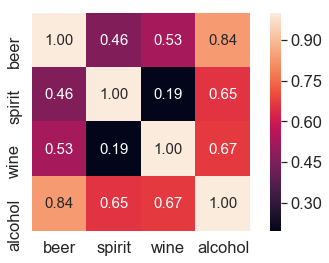

In [9]:

import seaborn as sns

# corr 행렬 히트맵을 시각화합니다.
cols_view = ['beer', 'spirit', 'wine', 'alcohol'] # 그래프 출력을 위한 cols 이름을 축약합니다.
sns.set(font_scale=1.5)
hm = sns.heatmap(corr.values,
            cbar=True,
            annot=True, 
            square=True,
            fmt='.2f',
            annot_kws={'size': 15},
            yticklabels=cols_view,
            xticklabels=cols_view)

plt.tight_layout()
plt.show()

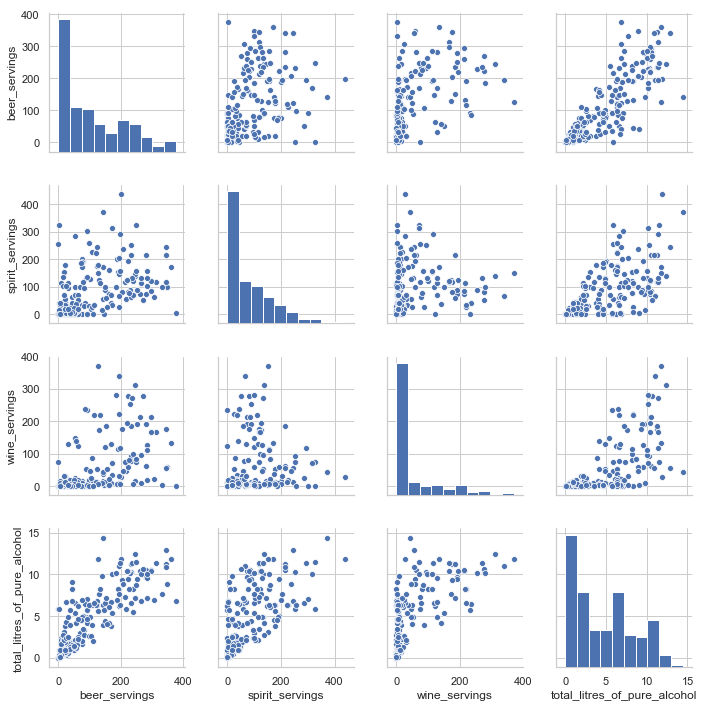

In [10]:
# 시각화 라이브러리를 이용한 피처간의 scatter plot을 출력합니다.
sns.set(style='whitegrid', context='notebook')
sns.pairplot(drinks[['beer_servings', 'spirit_servings', 
                     'wine_servings', 'total_litres_of_pure_alcohol']], height=2.5)
plt.show()

In [11]:
print(drinks.isnull().sum())
print("------------------------------------")
print(drinks.dtypes)

country                          0
beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
continent                       23
dtype: int64
------------------------------------
country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object


In [13]:
# 결측데이터를 처리합니다 : 기타 대륙으로 통합 -> 'OT'
drinks['continent'] = drinks['continent'].fillna('OT')

In [14]:
print(drinks.isnull().sum())

country                         0
beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
continent                       0
dtype: int64


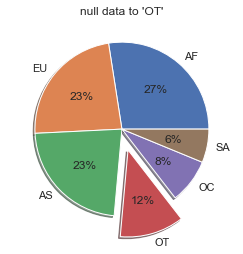

In [15]:
fracs1 = drinks['continent'].value_counts().values.tolist()
labels = drinks['continent'].value_counts().index.tolist()
explode = (0, 0, 0, 0.25, 0, 0)

plt.pie(fracs1, explode=explode, labels=labels, autopct='%.0f%%', shadow=True)
plt.title('null data to \'OT\'')
plt.show()

In [16]:
# 대륙별 spirit_servings의 평균, 최소, 최대, 합계를 계산합니다.
result = drinks.groupby('continent').spirit_servings.agg(['mean', 'min', 'max', 'sum'])
result = drinks.groupby('continent')['spirit_servings'].agg(['mean', 'min', 'max', 'sum']) # 같음

result.head()

mean  min  max   sum
continent                            
AF          16.339623    0  152   866
AS          60.840909    0  326  2677
EU         132.555556    0  373  5965
OC          58.437500    0  254   935
OT         165.739130   68  438  3812

In [20]:
total_mean = drinks.total_litres_of_pure_alcohol.mean()
continent_mean = drinks.groupby('continent').total_litres_of_pure_alcohol.mean()
continent_mean = continent_mean[continent_mean>total_mean]
continent_mean

continent
EU    8.617778
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64

In [21]:
!pip install scipy

In [22]:
# 아프리카와 유럽간의 맥주 소비량 차이를 검정합니다.
africa = drinks.loc[drinks['continent']=='AF']
europe = drinks.loc[drinks['continent']=='EU']

from scipy import stats
tTestResult = stats.ttest_ind(africa['beer_servings'], europe['beer_servings'])
tTestResultDiffVar = stats.ttest_ind(africa['beer_servings'], europe['beer_servings'], equal_var=False)

print("The t-statistic and p-value assuming equal variances is %.3f and %.3f." % tTestResult)
print("The t-statistic and p-value not assuming equal variances is %.3f and %.3f" % tTestResultDiffVar)

The t-statistic and p-value assuming equal variances is -7.268 and 0.000.
The t-statistic and p-value not assuming equal variances is -7.144 and 0.000
